# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Install

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Prep

In [4]:
X=df.drop('class',axis=1)

In [5]:
y=df['class']

In [6]:
X=pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

# Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101)

# Gradient Boosting and Grid seach with CV

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid={'n_estimators':[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [15]:
gb_model=GradientBoostingClassifier()

In [16]:
grid=GridSearchCV(gb_model,param_grid)

# Fill to Training Data with CV search

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [18]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

# Performance

In [20]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [22]:
predictions=grid.predict(X_test)

In [23]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [25]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.40011379e-16, 0.00000000e+00, 0.00000000e+00,
       1.01013321e-16, 1.04524302e-03, 1.18312069e-05, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.43064856e-17, 0.00000000e+00, 0.00000000e+00, 1.01895537e-08,
       2.31056241e-03, 5.15310362e-02, 1.84253604e-04, 1.41117048e-02,
       1.82499853e-02, 4.45469666e-05, 6.14762854e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 4.45762297e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.34489839e-18,
       3.41275973e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.53758068e-04, 1.51892097e-03, 1.35970429e-01, 7.71855052e-03,
       2.56315613e-02, 3.59944816e-03, 7.96289722e-06, 4.95063766e-06,
       1.83319493e-05, 1.42943863e-03, 4.25527528e-02, 4.61878655e-04,
       0.00000000e+00, 0.00000000e+00, 3.67811493e-06, 0.00000000e+00,
      

In [26]:
feat_import=grid.best_estimator_.feature_importances_

In [28]:
imp_feats=pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [30]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.400114e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.010133e-16
...,...
habitat_l,0.000000e+00
habitat_m,1.648790e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [31]:
imp_feats.sort_values('Importance',ascending=False)

,Importance
odor_n,0.614763
stalk-root_c,0.135970
bruises_t,0.051531
stalk-surface-below-ring_y,0.042553
spore-print-color_r,0.030495
...,...
gill-color_h,0.000000
veil-color_o,0.000000
gill-color_e,0.000000
veil-color_y,0.000000


In [32]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064653,0.0,0.0,6.469357e-08,0.000896,0.614763


In [33]:
imp_feats=imp_feats[imp_feats['Importance']>0.000527]

In [34]:
imp_feats.sort_values('Importance')

,Importance
stalk-shape_t,0.000854
stalk-color-below-ring_w,0.000871
odor_p,0.000921
cap-surface_g,0.001045
population_c,0.001176
ring-type_n,0.001392
stalk-surface-below-ring_s,0.001429
ring-type_p,0.001451
stalk-root_b,0.001519
cap-color_y,0.002311


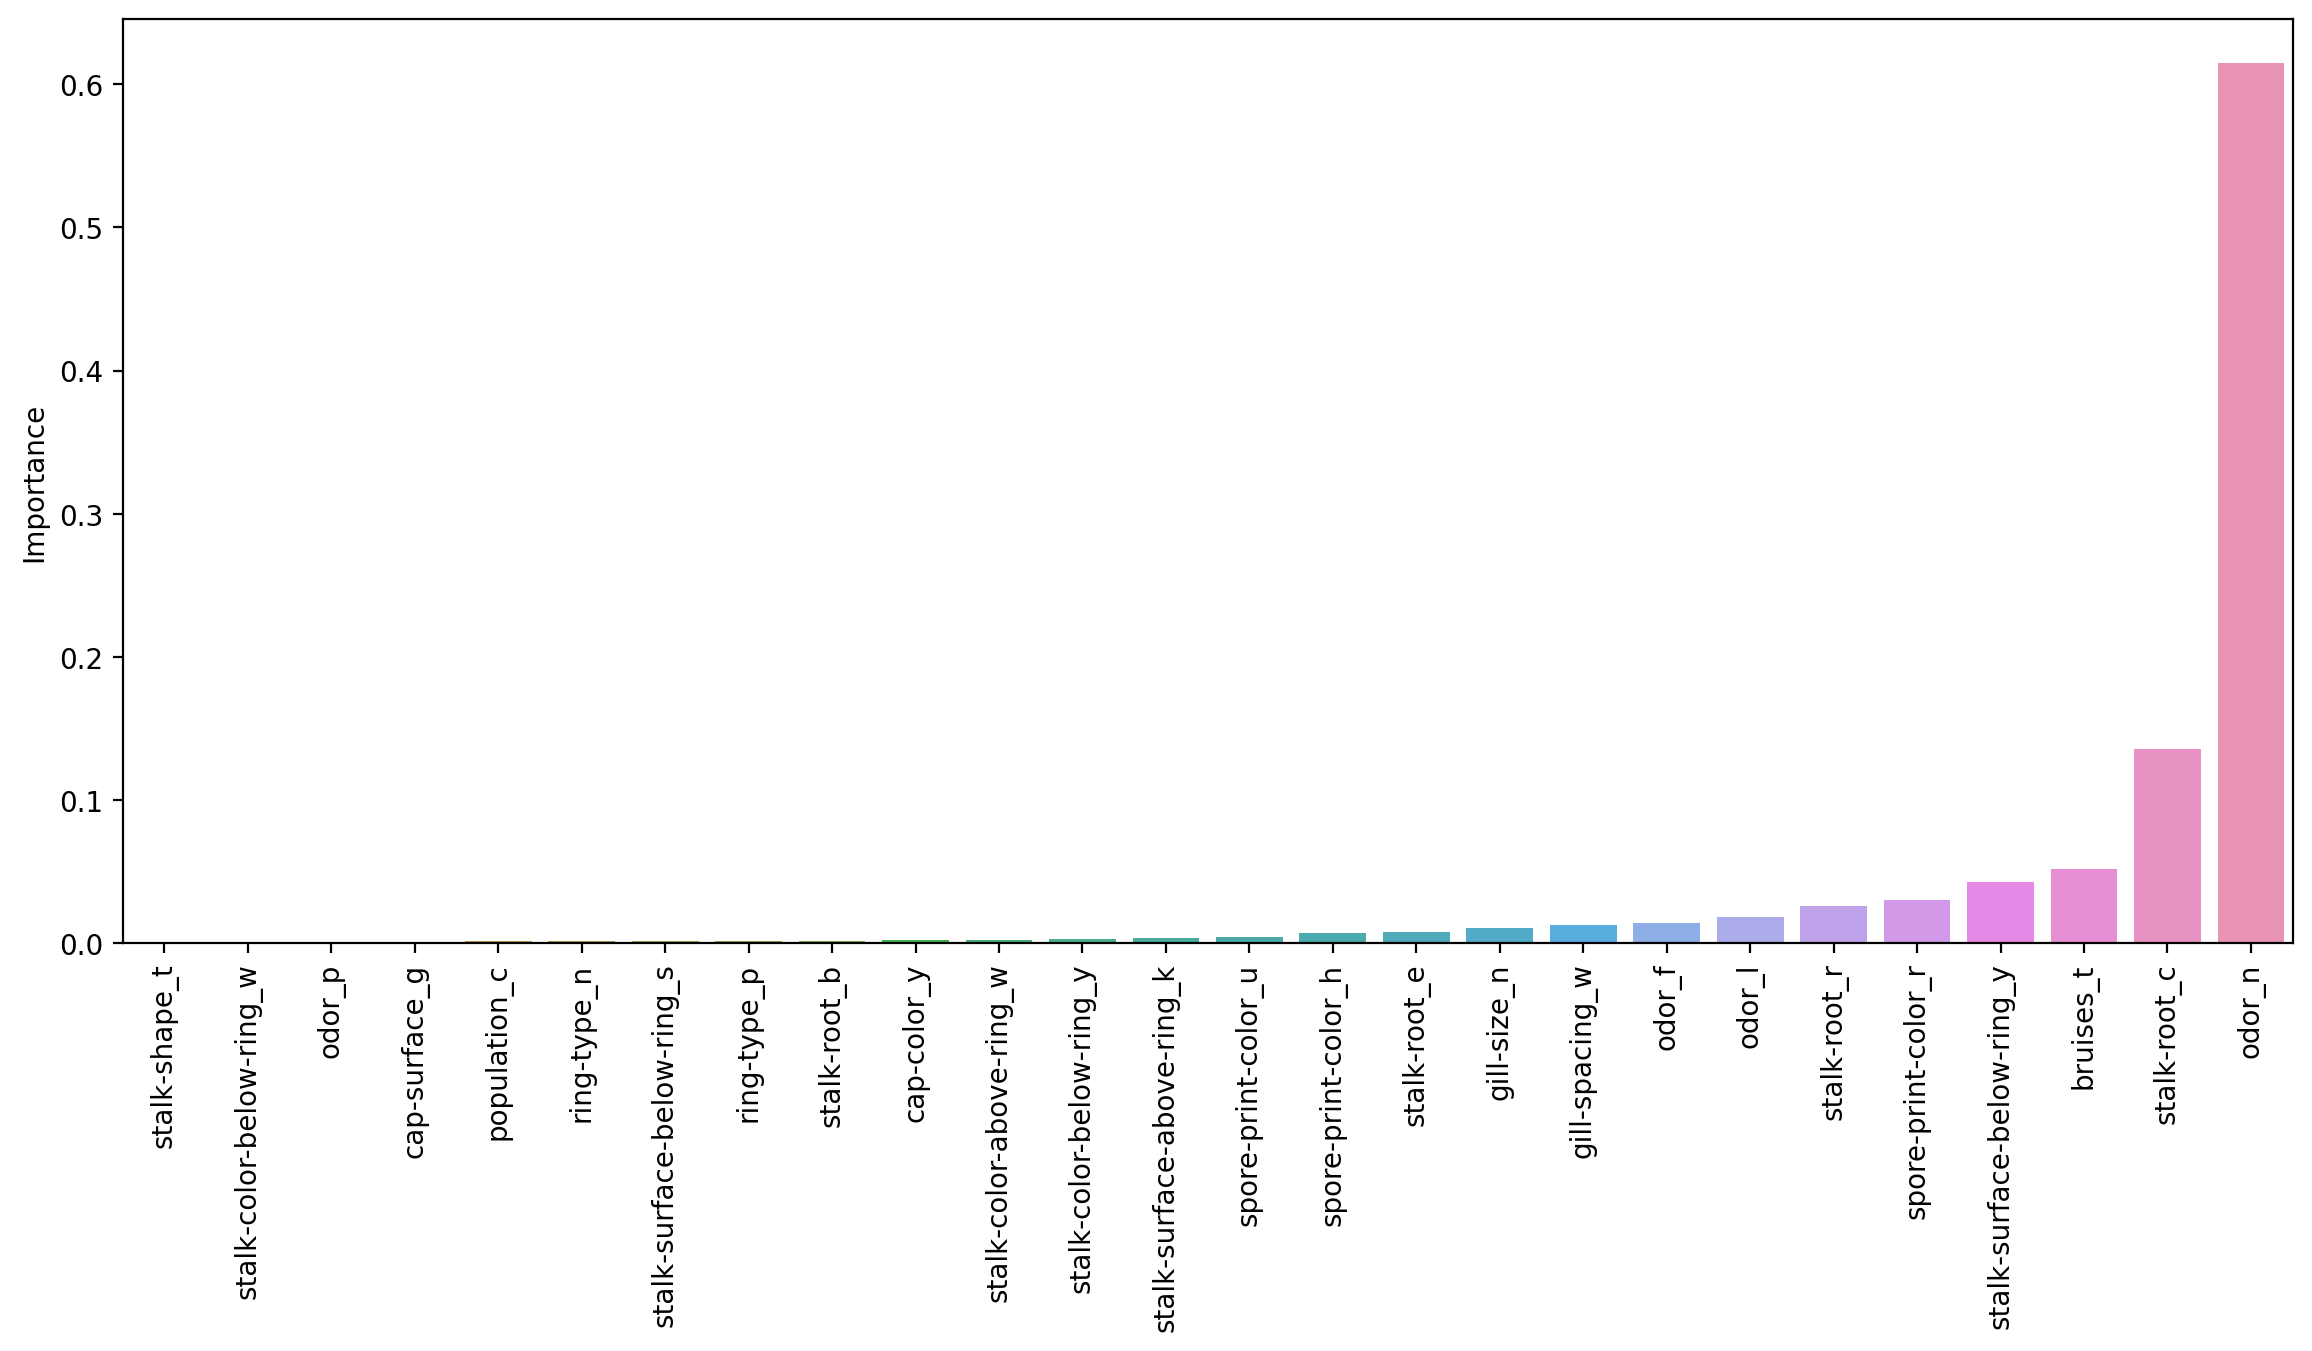

In [37]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);